In [10]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import spectral
import glob
import os

In [11]:
#file = '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/NPK_DIST/20240625-110407-905370.img'
#header_file = '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/NPK_DIST/20240625-110407-905370.hdr'

file = '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/CONTROL/Bk2control-20240625-121341-364392.img'
header_file = '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/CONTROL/Bk2control-20240625-121341-364392.hdr'

directory = '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/'

dates = glob.glob(directory + '*/')

blocks = []
for date in dates:
    blocks.append(glob.glob(date + '*/'))

treatments = []
for date in blocks:
    for block in date:
        treatments.append(glob.glob(block + '*/'))

print(treatments)



[['/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/DIST/', '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/NPK_DIST/', '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/Control/'], ['/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_26/BLOCK_A/NPK/', '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_26/BLOCK_A/NPK_CESS/'], ['/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_26/BLOCK_B/DIST/', '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_26/BLOCK_B/NPK_DIST/'], ['/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_26/BLOCK_D/DIST/', '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_26/BLOCK_D/NPK_DIST/'], ['/Volumes/LaCie/Living_Optics_hypers

In [12]:
for i in treatments:
    for j in i:
        files = glob.glob(j + '/*.npy')
        for file in files:
            data = np.load(file)
            fig = plt.figure()
            plt.imshow(data[:,:,95])
            out_file = '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/' + '/'.join(j.split('/')[-4:-1]) + '/' + file.split('/')[-1].split('.')[0] + '.png'
            print(out_file)
            fig.savefig(out_file)
            plt.close(fig)

        


/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/2024_06_25/BLOCK_A/DIST/BkAdist-20240625-125323-306152-single-enhanced.png
/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/2024_06_25/BLOCK_A/DIST/BkAdist-20240625-125326-254057-enhanced.png
/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/2024_06_25/BLOCK_A/DIST/BkAdist-20240625-125346-760150-single-enhanced.png
/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/2024_06_25/BLOCK_A/DIST/BkAdist-20240625-125347-776916-single-enhanced.png
/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/2024_06_25/BLOCK_A/DIST/BkAdist-20240625-125349-328998-enhanced.png
/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/2024_06_25/BLOCK_A/DIST/BkAdist-20240625-125407-954303-single-enhanced.png
/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Spectral_images/2024_06_25/BLOCK_A/DIST/BkAdist-

In [13]:
with rasterio.open(file) as src:
    hyperspectral_data = src.read()

    print('Shape of hyperspectral data:',hyperspectral_data.shape)
    print('Number of bands:',src.count)
    print('Wavelengths:',src.indexes)

img = spectral.open_image(header_file)

wavelengths = img.bands.centers

print('Shape of hyperspectral data:', img.shape)
print('Number of bands:', img.shape[2])
print('Wavelengths:', wavelengths)

#ind = wavelengths.index(50)
plt.imshow(hyperspectral_data[70,:,:])
plt.show()



RasterioIOError: '/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_27/BLOCK_C/NPK_DIST/Blockcnpkdistq3cA-20240627-131007-552360-enhanced.npy' not recognized as being in a supported file format.

(637, 635, 96)


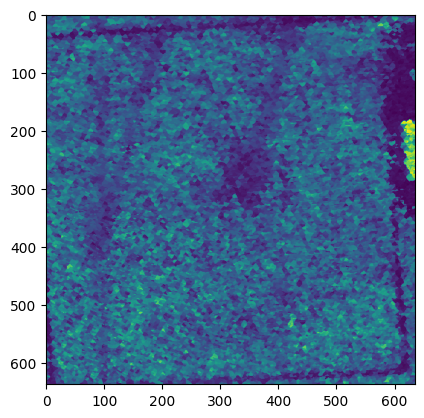

[[[5.40387155e-05 4.93759908e-05 4.47870916e-05 ... 4.54945752e-04
   4.32099449e-04 3.41560080e-04]
  [5.40387155e-05 4.93759908e-05 4.47870916e-05 ... 4.54945752e-04
   4.32099449e-04 3.41560080e-04]
  [5.40387155e-05 4.93759908e-05 4.47870916e-05 ... 4.54945752e-04
   4.32099449e-04 3.41560080e-04]
  ...
  [4.66861311e-05 4.22227276e-05 3.90967361e-05 ... 2.19910624e-04
   2.43566319e-04 1.99355301e-04]
  [4.66861311e-05 4.22227276e-05 3.90967361e-05 ... 2.19910624e-04
   2.43566319e-04 1.99355301e-04]
  [4.66861311e-05 4.22227276e-05 3.90967361e-05 ... 2.19910624e-04
   2.43566319e-04 1.99355301e-04]]

 [[3.90155474e-05 3.66792810e-05 3.53056130e-05 ... 4.23670484e-04
   3.95307550e-04 3.58442951e-04]
  [5.40387155e-05 4.93759908e-05 4.47870916e-05 ... 4.54945752e-04
   4.32099449e-04 3.41560080e-04]
  [5.40387155e-05 4.93759908e-05 4.47870916e-05 ... 4.54945752e-04
   4.32099449e-04 3.41560080e-04]
  ...
  [4.66861311e-05 4.22227276e-05 3.90967361e-05 ... 2.19910624e-04
   2.43566

In [ ]:
data = np.load('/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/Enhanced_images/2024_06_25/BLOCK_A/DIST/BkAdist-20240625-125326-254057-enhanced.npy')
print(data.shape)
plt.imshow(data[:,:,95])
plt.show()
print(data)